### Decision Trees as Regression Models - California Housing~ Precticting House Price based on HouseAge,Room# and geographiocal location

We use the California Housing dataset to obtain a Decision Tree model, which is then used to predict the median house prices in various districts across California.

In [51]:
# 1) Import the tools you’ll need
# These are fundamental libraries:
#
# numpy (np): fast numerical arrays and math operations.
# pandas (pd): for working with tables (dataframes).
# random (rnd): a tiny helper if you need simple randomness.
#
# Why it matters — even simple data science projects start
# by importing these building blocks.

import numpy as np
import pandas as pd  
import random as rnd

In [53]:
#2) Make Jupyter show every output in a cell - this is optional , I added as I like tio see what each line does 
# Jupyter normally shows only the last expression’s output in a cell.
# This line configures the notebook so that every expression’s result in a cell is displayed.
#
# Why it matters — great for teaching and debugging because you can see
# intermediate outputs (dataframes, numbers, etc.) without adding print() everywhere.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [55]:
# 3) Load the California Housing dataset into a DataFrame
#
# What this does —
# scikit-learn provides the California housing dataset.
# We load it and wrap the features into a pandas.DataFrame with readable column names.
# Displaying cali_df shows the table.
#
# Why it matters —
# DataFrames make it easy to inspect columns and values,
# which is the first step in any data project.

from sklearn.datasets import fetch_california_housing
cali_dataset=fetch_california_housing()
cali_df = pd.DataFrame(cali_dataset.data,columns=cali_dataset.feature_names)
cali_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [57]:
# 4) Add the target variable (median house value)
#
# What this does —
# The dataset separates features and targets; here we add the target
# (median house value for each row) as a new column named 'MedHouseVal'.
#
# Why it matters —
# Now the DataFrame has both the input features and
# the value we want to predict (the target).

cali_df['MedHouseVal']=cali_dataset.target
cali_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [61]:
#5) Document the data (comments)
# Data Sorce Link :https://scikit-learn.org/0.24/datasets/real_world.html#california-housing-dataset
# Attribute Information
# MedInc median income in block
# HouseAge median house age in block
# AveRooms average number of rooms
# AveBedrms average number of bedrooms
# Population block population
# AveOccup average house occupancy
# Latitude house block latitude
# Longitude house block longitude

names=cali_dataset.feature_names
names


['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [63]:
# 6) (Typical) Quick EDA — inspect head, info, shape, describe
#
# What this does —
# Shows the first few rows, data types, summary statistics,
# and the number of rows and columns.
#
# Why it matters —
# Quick checks help catch missing values, unexpected data types,
# or obvious data issues before moving on to modeling.

cali_df.head()
cali_df.info()
cali_df.describe()
cali_df.shape

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


(20640, 9)

In [65]:
# 7) Prepare features and target for modeling
#
# What this does —
# X contains the input features; y contains the target values.
# We separate them because scikit-learn models expect this format.
#
# Why it matters —
# Modeling functions require a feature matrix (X) and a label vector (y).

X = cali_df.drop('MedHouseVal', axis=1)
y = cali_df['MedHouseVal']

In [67]:
# 7) Prepare features and target for modeling using DecisionTreeRegressor from sklearn
#
# What this does —
# X contains the input features ( 8 input colums); y contains the target values(new predicted column).
# We separate them because scikit-learn models expect this format.
#
# Why it matters —
# Modeling functions require a feature matrix (X) and a label vector (y).



from sklearn.tree import DecisionTreeRegressor 
array= cali_df.values

X=array[:,0:8]
Y=array[:,8]

X
Y

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [69]:
# 8) Split into training and test sets
#
# What this does —
# Randomly splits the data into a training set (used to train the model)
# and a test set (used to evaluate it).
# test_size=0.2 reserves 20% of the data for testing.
# random_state ensures the split is reproducible.
#
# Why it matters —
# Testing on unseen data gives a realistic sense of how well
# the model will perform on new, unseen inputs.

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1234)
len(X_train)
len(Y_train)
len(X_test)
len(Y_test)

14448

14448

6192

6192

### Decision Tree

<u>Note</u>: Changing max_leaf_nodes from 10 to 20 only results in an R-squared increase
of 0.04, and a far greater increase in depth/complexity.

In [73]:
# 9) Fit a Decision Tree Regressor
#
# What this does —
# Creates a Decision Tree regression model and trains (fits) it
# using the training data (X_train, y_train).
#
# Why it matters —
# Decision Trees are easy to visualize and understand.
# They’re great for teaching regression intuition and
# for seeing how the model makes decisions based on feature values.

model=DecisionTreeRegressor(max_leaf_nodes = 10)
regTree=model.fit(X_train,Y_train)
regTree

DecisionTreeRegressor(max_leaf_nodes=10)

In [85]:
#Step 10: Making a prediction for a random sample
# What this does:
# rnd.seed(123458) — sets a random seed.
# This ensures that every time you run the notebook, 
# it picks the same random number. (Reproducibility = good science!)
#
# rnd.randrange(X.shape[0]) — chooses a random integer between 0 
# and the total number of rows in X.
#
# X_new = X_new.reshape(1,8) — selects one random row (a single data point) from the dataset.
# Displaying X_new shows its feature values — e.g., median income, house age, etc.
#
# Why this matters:
# Instead of predicting on the whole test set, this picks one house and asks the model,
# “What price do you think this house will have?”

rnd.seed(123458)
X_new=X[rnd.randrange(X.shape[0])]
X_new

X_new=X_new.reshape(1,8)
X_new
YHat=model.predict(X_new)
YHat

array([   6.3467    ,   44.        ,    6.99406528,    1.0148368 ,
        891.        ,    2.64391691,   34.18      , -118.12      ])

array([[   6.3467    ,   44.        ,    6.99406528,    1.0148368 ,
         891.        ,    2.64391691,   34.18      , -118.12      ]])

array([2.6738749])

In [87]:
# Step 11: Presenting the prediction in a clean table

# Creates a small table (DataFrame) from your one data sample.
# Each column has its proper name (like MedInc, HouseAge, etc.).
# Adds a new column called "Predicted Price," which stores your model’s output
# df.head(1) Shows the first (and only) row — all the house details plus the model’s predicted price.

df=pd.DataFrame(X_new,columns = names)
df["Predicted Price"]=YHat
df.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Predicted Price
0,6.3467,44.0,6.994065,1.014837,891.0,2.643917,34.18,-118.12,2.673875


In [25]:
# Step 12 Predict & evaluate the model
#
# What this does —

# imports the R² (R-squared) metric function from scikit-learn.
# R² is a standard way to measure the performance of regression models 
# (like your DecisionTreeRegressor).
#
# Interpretation of R²:
# R² = 1 → Perfect prediction (the model explains 100% of the variation in the target).
# R² = 0 → The model is no better than predicting the mean (no explanatory power).
# R² < 0 → The model performs worse than a simple average guess.
#
# The predict() method applies the trained Decision Tree model
# to unseen test data (X_test) to generate predictions (y_Hat).

# Here, you use your trained model to predict outputs (YHat) for the test input data (X_test).
# The result, YHat, is an array of predicted values — e.g., predicted house prices.
# Why it matters —
# These metrics tell you whether the model is accurate enough to be useful
# or if it needs improvement (through tuning, more data, or a different model).

from sklearn.metrics import r2_score
YHat=model.predict(X_test)
r2 = r2_score(Y_test, YHat)
print("R-Squared = ", np.round(r2, 2))

R-Squared =  0.54


In [91]:
from IPython.display import Image   # To display images directly inside Jupyter Notebook
from sklearn import tree            # To access decision tree functions from scikit-learn
import matplotlib.image as mpimg     # To read and display image files using matplotlib
import io                            # To handle in-memory file-like objects (used for .dot data)
import matplotlib.pyplot as plt      # To create and show plots or images
!pip install pydotplus               # Install pydotplus library for converting .dot files to images
import pydotplus                     # Import pydotplus to create image graphs from .dot data
!pip install graphviz                # Install Graphviz backend to render decision tree visuals

True

<Figure size 10000x10000 with 0 Axes>

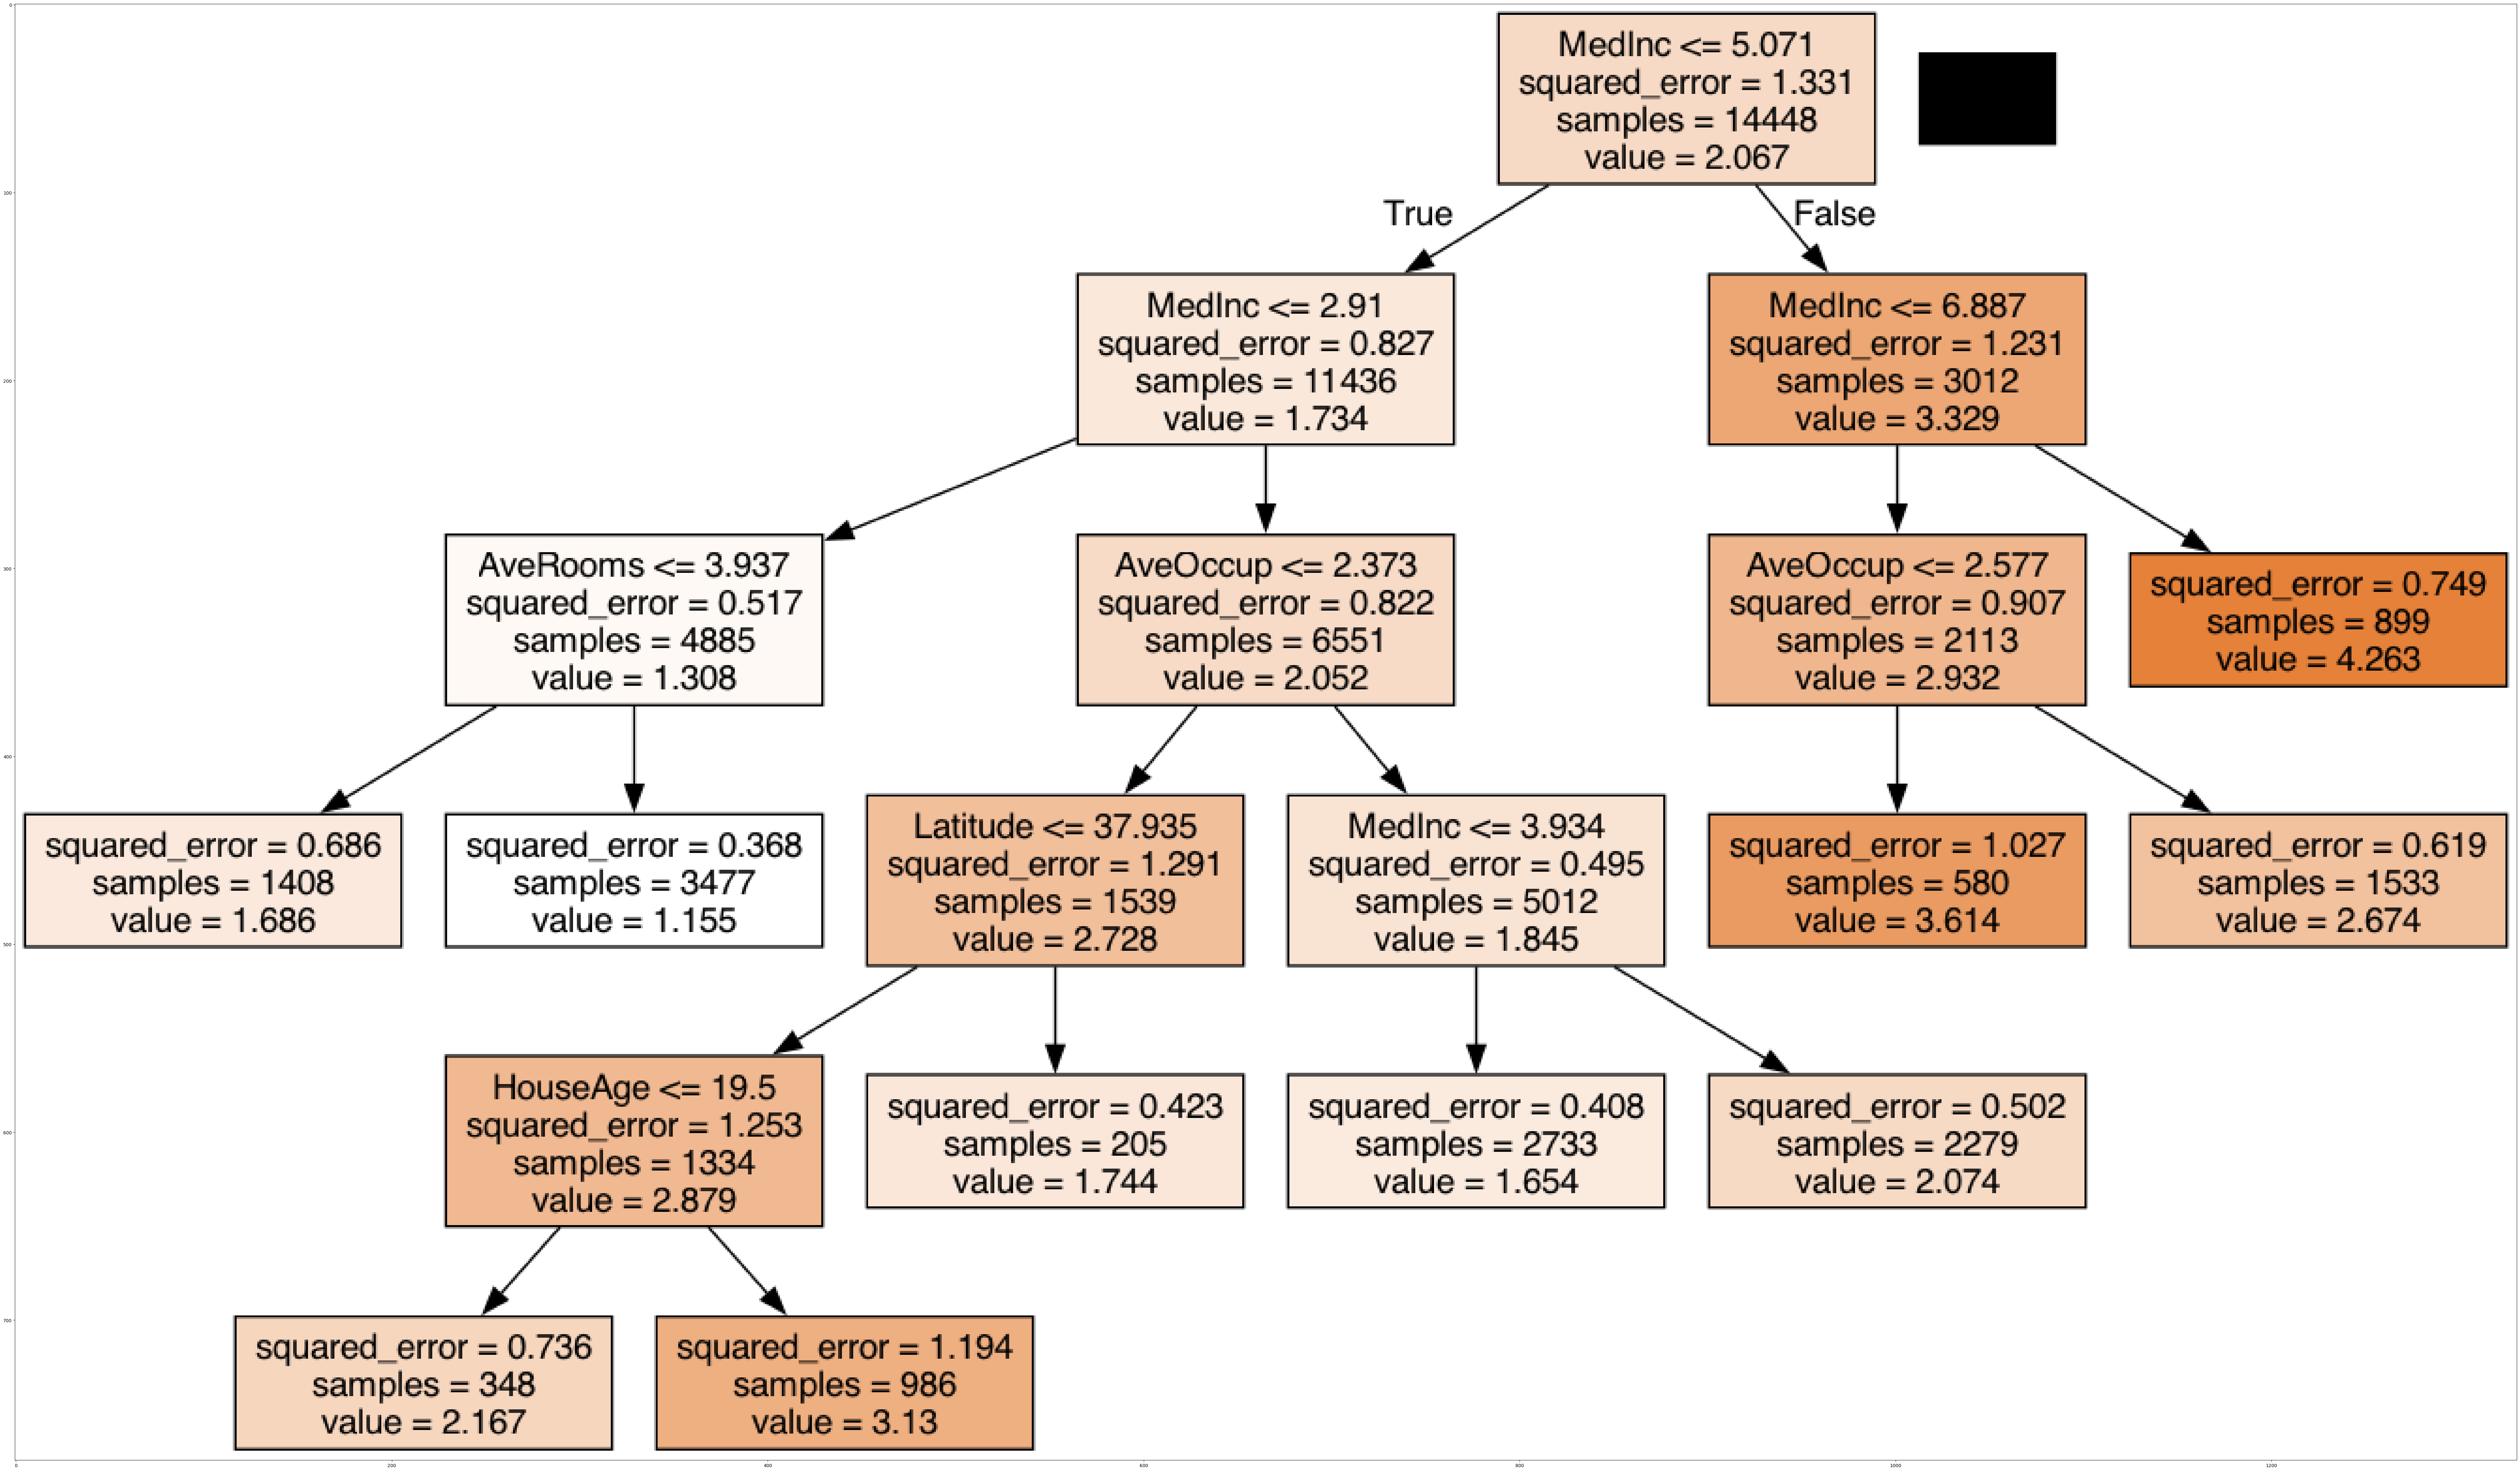

In [93]:
dot_data = io.StringIO()   # Create an in-memory text stream to store the decision tree data in .dot format
dot_data                   # Display the empty StringIO object (optional, just shows it's created)

tree.export_graphviz(regTree, out_file=dot_data, filled=True, feature_names=names)  
# Export the trained decision tree (regTree) as .dot data with filled color nodes and feature names

# Draw graph
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('dt.png')  
# Convert the .dot data to a graph object and save it as a PNG image file (dt.png)

plt.figure(figsize=(100, 100))  
# Create a very large figure to properly display the detailed decision tree image

img = mpimg.imread('dt.png')  
# Read the saved PNG image file into Python using matplotlib

implot = plt.imshow(img)  
# Display the image of the decision tree inside the notebook

In [ ]:
# How to read the tree (in simple words):
#Start at the top (root node) — here the model first checks MedInc (median income).
#Follow the True/False branches depending on the condition.
#Keep following until you reach a leaf node (no further splits).
#The “value” at the leaf is your model’s predicted target for that path.

# Attribute        Meaning
# ------------------------------------------------------------
# Feature ≤ Threshold   # Splitting rule for that node
# squared_error         # How “impure” or variable the node’s values are
# samples               # Number of data points in that node
# value                 # Predicted output (mean target value) for that node
# Color                 # Indicates relative prediction value (light = low, dark = high)




### Examine the output

In [95]:
cali_df.shape   # Returns the number of rows and columns in the DataFrame (as a tuple)
regTree.max_features_   # Shows the number of features considered when looking for the best split in the trained Decision Tree

(20640, 9)

8

In [99]:
# Create a DataFrame showing each feature name and its importance score from the trained decision tree
feature_imp = pd.DataFrame({"Feature": cali_dataset.feature_names,
                           "Importance": regTree.feature_importances_})
feature_imp

,Feature,Importance
0,MedInc,0.814452
1,HouseAge,0.021691
2,AveRooms,0.025705
3,AveBedrms,0.000000
4,Population,0.000000
5,AveOccup,0.117332
6,Latitude,0.020820
7,Longitude,0.000000


In [101]:
relevant_features = feature_imp[feature_imp["Importance"] > 0] # Filter out only the features that have non-zero importance in the model
relevant_features = relevant_features.sort_values(["Importance"]) # Sort the remaining features in ascending order of their importance

<Axes: xlabel='Feature', ylabel='Importance'>

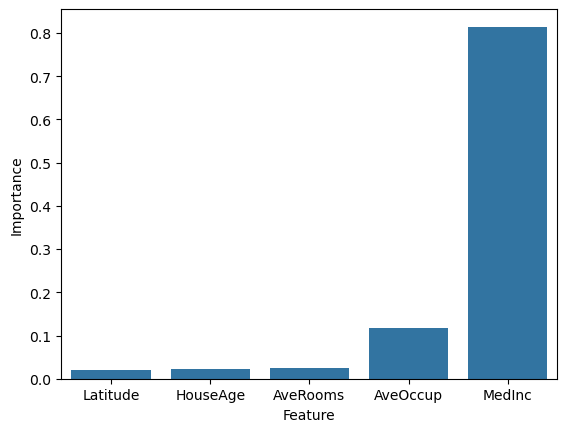

In [103]:
import seaborn as sns   # Import Seaborn library for creating attractive and easy-to-read plots
sns.barplot(x="Feature", y="Importance", data=relevant_features)  
# Plot a bar chart showing each feature on the x-axis and its importance score on the y-axis